In [ ]:
import numpy as np
import matplotlib.pyplot as plt

data = np.array([321663, -6180, -6356, -6351, -6268, -20356, -6150, -6180, -358549, -6327, -29250])


In [ ]:
# Parámetros para simulación (variación del +/- 10%)
variacion_min = 0.9
variacion_max = 1.1
n_simulaciones = 1000

In [ ]:
# Generar simulaciones
simulaciones = []
for _ in range(n_simulaciones):
    variaciones = np.random.uniform(variacion_min, variacion_max, size=data.size)
    simulacion = data * variaciones
    simulaciones.append(simulacion)


In [ ]:
# Convertir a array para análisis
simulaciones = np.array(simulaciones)

# Calcular estadísticas
promedios = np.mean(simulaciones, axis=0)
minimos = np.min(simulaciones, axis=0)
maximos = np.max(simulaciones, axis=0)

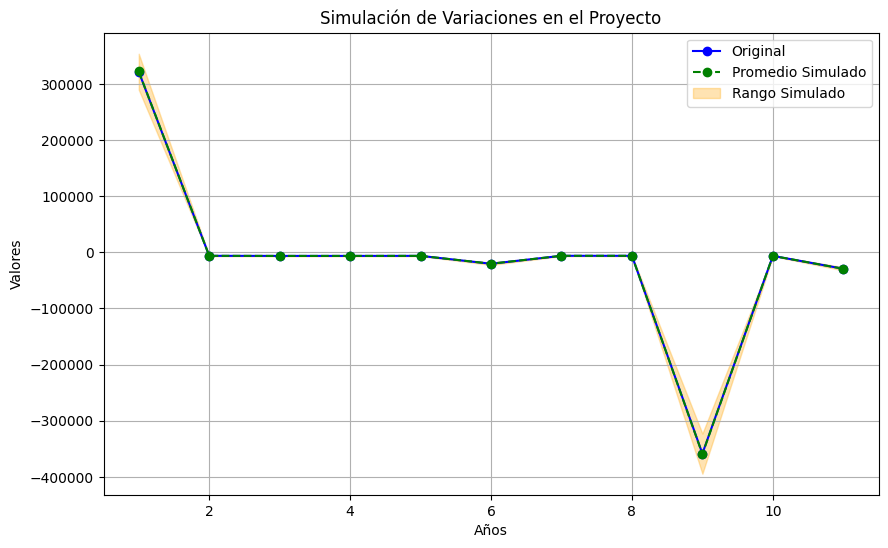

In [ ]:
# Visualización de resultados
años = np.arange(1, data.size + 1)

plt.figure(figsize=(10, 6))
plt.plot(años, data, label='Original', marker='o', linestyle='-', color='blue')
plt.plot(años, promedios, label='Promedio Simulado', marker='o', linestyle='--', color='green')
plt.fill_between(años, minimos, maximos, color='orange', alpha=0.3, label='Rango Simulado')
plt.xlabel('Años')
plt.ylabel('Valores')
plt.title('Simulación de Variaciones en el Proyecto')
plt.legend()
plt.grid()
plt.show()

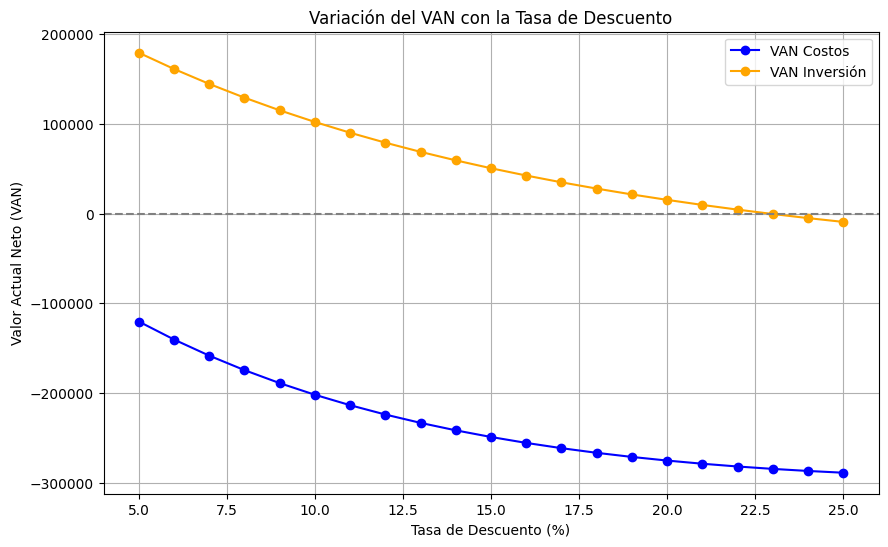

    Tasa de Descuento (%)     VAN Costos  VAN Inversión
0                     5.0 -120227.452365  179383.248190
1                     6.0 -140271.591328  161266.357032
2                     7.0 -158261.376567  144618.602820
3                     8.0 -174403.363897  129304.132906
4                     9.0 -188881.898003  115201.230949
5                    10.0 -201861.678050  102200.696153
6                    11.0 -213490.006340   90204.424109
7                    12.0 -223898.761696   79124.162343
8                    13.0 -233206.133417   68880.417480
9                    14.0 -241518.146718   59401.494172
10                   15.0 -248930.006353   50622.648729
11                   16.0 -255527.281475   42485.342729
12                   17.0 -261386.951703   34936.583912
13                   18.0 -266578.331710   27928.343358
14                   19.0 -271163.889340   21417.039461
15                   20.0 -275199.970321   15363.080439
16                   21.0 -278737.440914    9730

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Definir parámetros para la simulación
rango_tasa = np.linspace(0.05, 0.25, 21)  # Tasa de descuento: 5% a 25%
n_simulaciones = 1000  # Número de simulaciones

# Datos de costos e inversión
costos = np.array([-459240, 9000, 9000, 9000, 9000, 23000, 9000, 9000, 361340, 9000, 31900])
inversion = np.array([-183436, 49782, 46671, 46765, 48226, 46671, 50300, 49782, 49283, 47188, 46775])

# Simular distribuciones para la tasa de descuento
triangular_tasas = np.random.triangular(0.05, 0.15, 0.25, size=n_simulaciones)
normal_tasas = np.random.normal(0.15, 0.05, size=n_simulaciones)

# Función para calcular el VAN
def calcular_van(tasa, flujos):
    return np.sum(flujos / (1 + tasa) ** np.arange(1, len(flujos) + 1))

# Calcular VAN para cada tasa de descuento
van_costos = [calcular_van(tasa, costos) for tasa in rango_tasa]
van_inversion = [calcular_van(tasa, inversion) for tasa in rango_tasa]

# Crear un DataFrame para los resultados
tabla_sensibilidad = pd.DataFrame({
    "Tasa de Descuento (%)": (rango_tasa * 100).round(1),
    "VAN Costos": van_costos,
    "VAN Inversión": van_inversion
})

# Visualización
plt.figure(figsize=(10, 6))
plt.plot(rango_tasa * 100, van_costos, label="VAN Costos", marker='o', color='blue')
plt.plot(rango_tasa * 100, van_inversion, label="VAN Inversión", marker='o', color='orange')
plt.axhline(0, color='gray', linestyle='--')
plt.xlabel("Tasa de Descuento (%)")
plt.ylabel("Valor Actual Neto (VAN)")
plt.title("Variación del VAN con la Tasa de Descuento")
plt.legend()
plt.grid()
plt.show()

# Mostrar la tabla de sensibilidad
print(tabla_sensibilidad)


VAN Medio: -130550.29 | Desviación Estándar: 27814.24
Costos Medios: 19752.53
Inversión Media: 298198.22


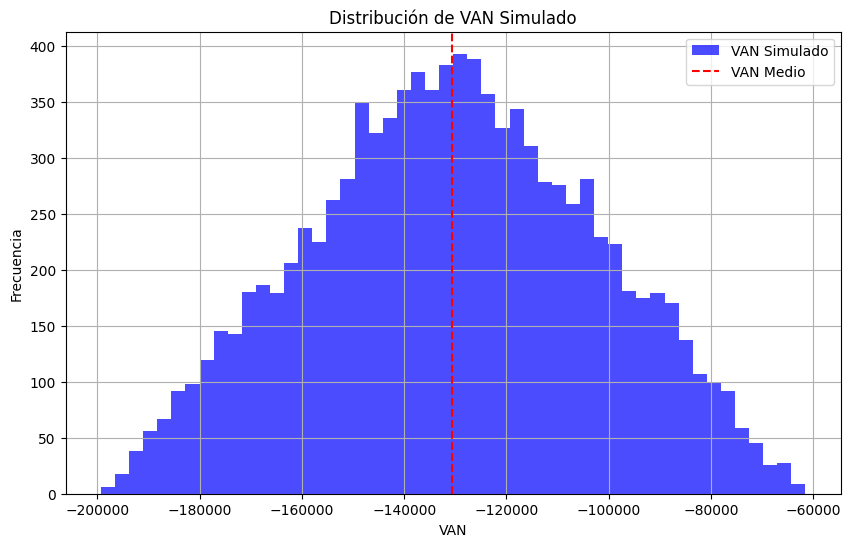

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Datos iniciales
van_neto = np.array([321663, -6180, -6356, -6351, -6268, -20356, -6150, -6180, -358549, -6327, -29250])
costos = np.array([-459240, 9000, 9000, 9000, 9000, 23000, 9000, 9000, 361340, 9000, 31900])
inversion = np.array([-183436, 49782, 46671, 46765, 48226, 46671, 50300, 49782, 49283, 47188, 46775])

# Parámetros de las simulaciones
num_simulaciones = 10000  # Número de escenarios a simular
variacion_min = 0.9  # Variación mínima (90%)
variacion_max = 1.1  # Variación máxima (110%)

# Generar simulaciones
sim_van_neto = []
sim_costos = []
sim_inversion = []

for i in range(num_simulaciones):
    # Generar valores aleatorios para cada variable dentro del rango de variación
    van_simulado = van_neto * np.random.uniform(variacion_min, variacion_max, size=len(van_neto))
    costo_simulado = costos * np.random.uniform(variacion_min, variacion_max, size=len(costos))
    inversion_simulada = inversion * np.random.uniform(variacion_min, variacion_max, size=len(inversion))

    # Guardar los resultados
    sim_van_neto.append(van_simulado.sum())  # Sumar el VAN simulado total por iteración
    sim_costos.append(costo_simulado.sum())  # Sumar los costos totales
    sim_inversion.append(inversion_simulada.sum())  # Sumar la inversión total

# Convertir listas a arrays
sim_van_neto = np.array(sim_van_neto)
sim_costos = np.array(sim_costos)
sim_inversion = np.array(sim_inversion)

# Calcular estadísticas para análisis
van_medio = sim_van_neto.mean()
van_std = sim_van_neto.std()
costos_medio = sim_costos.mean()
inversion_media = sim_inversion.mean()

# Mostrar estadísticas principales
print(f"VAN Medio: {van_medio:.2f} | Desviación Estándar: {van_std:.2f}")
print(f"Costos Medios: {costos_medio:.2f}")
print(f"Inversión Media: {inversion_media:.2f}")

# Visualización de los resultados
plt.figure(figsize=(10, 6))
plt.hist(sim_van_neto, bins=50, color="blue", alpha=0.7, label="VAN Simulado")
plt.axvline(van_medio, color="red", linestyle="dashed", linewidth=1.5, label="VAN Medio")
plt.title("Distribución de VAN Simulado")
plt.xlabel("VAN")
plt.ylabel("Frecuencia")
plt.legend()
plt.grid()
plt.show()
